# <center>Digital Image Processing - Problem Set 5</center>

### Student Names:
Jorge Ortega, Sebastian Salas, Katerine Vera

['three_bottles', 'new_bottles', 'hubble-original', 'figuras', 'bottles', 'face', 'shapes'] 

['image_0001', 'image_0002', 'image_0003', 'image_0004', 'image_0005', 'image_0006', 'image_0007', 'image_0008', 'image_0009', 'image_0010', 'image_0011', 'image_0012', 'image_0013', 'image_0014', 'image_0015', 'image_0016', 'image_0017', 'image_0018', 'image_0019', 'image_0020'] 



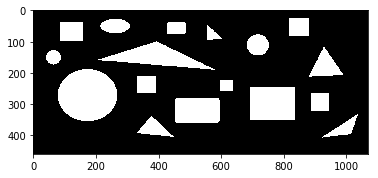

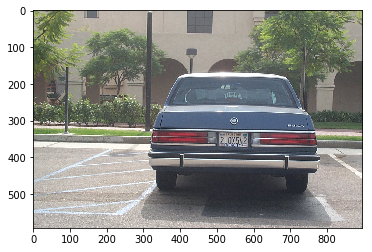

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from os import listdir, path
%matplotlib inline

pathCars = "cars"
pathImages = "img"

imgKeys   = []
carKeys   = []

files = {
    "car" :{ },
    "img":{ }
}

FilesImg = listdir("img")
FilesCars = listdir("cars")

FilesCars.sort(key=lambda x: int(''.join(filter(str.isdigit, x.split("_")[1].split(".")[0]))))

for i in FilesImg:
    key = i.split(".")[0]
    if key != "":
        imgKeys.append(key)
        files["img"][key] = cv2.imread(pathImages + "/" + i, cv2.IMREAD_GRAYSCALE)
        
for i in FilesCars:
    key = i.split(".")[0]
    if key != "":
        carKeys.append(key)
        temp = cv2.imread(pathCars + "/" + i, cv2.IMREAD_COLOR)
        files["car"][key] = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)


# Clean Up
FilesImg   = None
FilesCars  = None
pathCars   = None
pathImages = None

print(imgKeys , "\n")
print(carKeys, "\n")

# Test
plt.imshow(files["img"]["shapes"], cmap="gray")
plt.show()

plt.imshow(files["car"][carKeys[0]])
plt.show()


### Problem 1

Write a function that describes <i>each</i> object in a binary image using the Hu statistical moments. The Hu moments are invariant to rotation, scale and translation. These moments can be defined for <i>each</i> region in a binary image. The OpenCV function to compute these moments is <tt>cv2.HuMoments</tt>.

(0, array([[  2.41856340e-01],
       [  3.07716743e-02],
       [  1.78005985e-08],
       [  1.89604422e-09],
       [ -1.09102480e-17],
       [ -3.32381992e-10],
       [  1.51650329e-18]]))
(1, array([[  1.66302087e-01],
       [  2.91942743e-06],
       [  4.26254357e-07],
       [  2.03770218e-08],
       [  1.89246530e-15],
       [ -3.47011665e-11],
       [ -1.58482992e-16]]))
(2, array([[  1.60571821e-01],
       [  5.04412529e-05],
       [  9.07405059e-08],
       [  1.48387017e-09],
       [  1.35531693e-17],
       [  1.05375839e-11],
       [  1.06201303e-17]]))
(3, array([[  1.69660434e-01],
       [  2.59699774e-03],
       [  2.14987594e-07],
       [  7.60328220e-09],
       [  3.05513272e-16],
       [  3.86793352e-10],
       [  3.40346765e-17]]))
(4, array([[  1.59408857e-01],
       [  7.32551536e-05],
       [  5.46000513e-08],
       [  4.77063440e-11],
       [ -7.60901850e-20],
       [ -3.96788069e-13],
       [  1.17671049e-20]]))
(5, array([[  1.70990658e

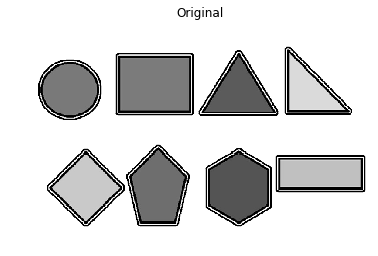

(0, array([[  2.23426570e-01],
       [  1.40664588e-02],
       [  5.15101887e-03],
       [  4.30129359e-04],
       [  4.32188108e-07],
       [  2.37550653e-05],
       [ -4.72361324e-07]]))
(1, array([[  2.97895312e-01],
       [  5.39431886e-02],
       [  6.47352884e-03],
       [  9.79422519e-04],
       [  1.44168915e-06],
       [  5.42723777e-05],
       [ -2.00090014e-06]]))
(2, array([[  1.95469416e-01],
       [  1.05816580e-02],
       [  6.71201528e-28],
       [  1.07835450e-27],
       [  8.75479878e-55],
       [  9.19288556e-29],
       [ -2.74220273e-55]]))
(3, array([[  1.66666667e-01],
       [  2.74893451e-27],
       [  2.61656015e-24],
       [  2.54990789e-24],
       [  6.58106712e-48],
       [ -1.33523962e-37],
       [ -2.66494482e-49]]))
(4, array([[ 0.1739424 ],
       [ 0.00247818],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]]))
(5, array([[  1.68838652e-01],
       [  7.28712794e-04],
  

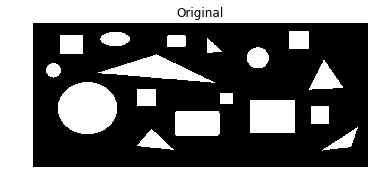

In [14]:
def humom(img): 
    #umbralización de la imagen 
    imgn = cv2.GaussianBlur(img, (7, 7), 3)
    _, cnt = cv2.threshold(imgn, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)

    # obtención de los contornos en la imagen
    _, contornos, _ = cv2.findContours(cnt, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    car = []
    for c in contornos:
        area = cv2.contourArea(c)
        #filtro de contornos no deseados como el borde de toda la imagen
        if area < 50000:
            # dibujar los contornos sobre las imagenes
            img_c = cv2.drawContours(img, [c], 0, (0, 255, 0), 2, cv2.LINE_AA)
            #obtención de los 7 momentos Hu de cada figura geometrica en la imagen
            mom = cv2.moments(c)
            car.append(cv2.HuMoments(mom))
    return img_c,car

# ["figuras.jpg","shapes.png"]
img1 = files["img"]["figuras"].copy()
img2 = files["img"]["shapes"].copy()

cont,hum = humom(img1)
for hm in enumerate(hum):
    print(hm)
    
plt.imshow(cont, cmap="gray")
plt.title("Original") 
plt.axis("off")
plt.show()
                 
cont2,hum2 =humom(img2)
for hm2 in enumerate(hum2):
    print(hm2)
    
plt.imshow(cont2, cmap="gray")
plt.title("Original") 
plt.axis("off")
plt.show()

A manera de conclusión, hu moments nos permite calcular un arreglo con datos que nos ayudan a caracterizar un objeto en particular, después de una segmentacion. Estos datos ayudan a identificar el objeto sin importar la variación de su rotación, escala y reflexión. Para poder usar la función correctamente, fue necesario umbralizar la imagen de entrada, es decir convertirla a una imagen binaria. Luego de este paso, fue necesario buscar los contornos de los objetos deseados en la imagen umbralizada, como se muestra en la imagen al final. Se observa como el contorno de cada poligono es marcado. Cabe resaltar que al calcular los diferentes contornos en la imagen, se marca commo contorno, el marco de la imagen. Lo anterior es innecesario, por lo tanto se implementó un metodo sencillo, estableciendo una condición, para solucionar esta situación. El umbral o valor usado, fue obtenido de manera experimental (tanteo). Finalmente,se usó la función moments en nuestra función interés hu moments. Moments calcula todos los momentos hasta el tercer orden de los polígonos o formas rasterizadas. Lo anterior fue usado en la función hu moments para calcular siete invariantes de hu, caracteristicos del objeto particular, en nuesto caso los momentos hu de los diferentes poligonos de la imagen. Lo anterior se muestra con dos ejemplos, donde uno contiene 8 arreglos y otro 17, de los cuales cada uno contiene un vector con los siete momentos hu de cada poligono de la imagen.

### Problem 2

Write a function that detects corners on an image using the Harris corner detection method. You can use the OpenCV built-in functions. Your function should output the $N$ detected corner locations in a $2 \times N$ matrix. Visualize your results by plotting the corners on top of the input image.  Apply your function to the binary image <tt> shapes.png</tt> and to the grayscale image <tt>face.tif</tt>.

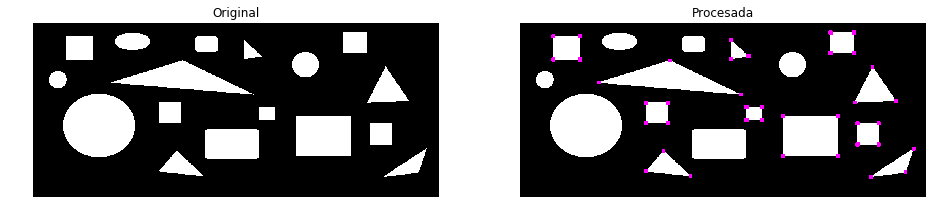

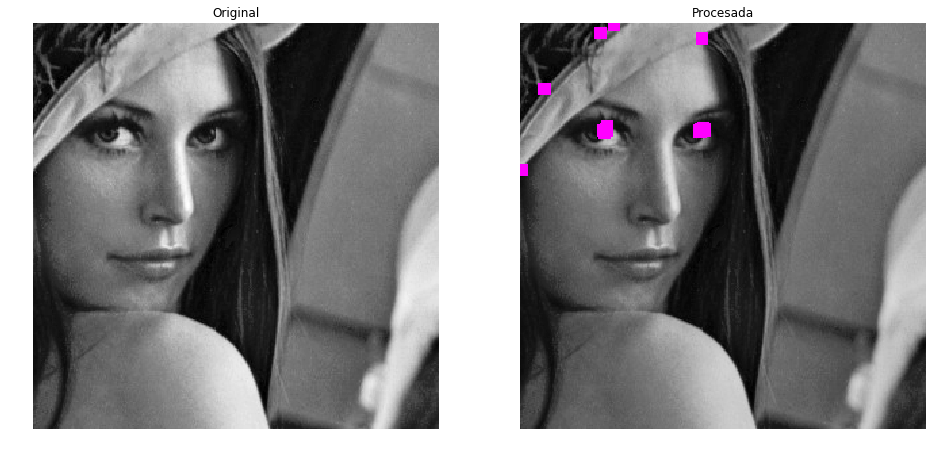

In [46]:
img = [files["img"]["shapes"].copy(), files["img"]["face"].copy()]

# Funcion detectora ####################################################
def cornerDetector(img):
    # Funcion para detectar las esquinas en una imagen
    #
    # Como entrada toma la imagen a procesar
    #
    # Como salida entrega la imagen con las esquinas señalads y las coordenadas de estas
    #
    th = 50
    dst = cv2.cornerHarris(np.float32(img), 3, 0, 0.08)

    
    cv2.normalize(dst, dst, 0, 1, cv2.NORM_MINMAX, cv2.CV_32FC1)
    
    kernel = np.ones((9, 9), np.uint8)
    dst = cv2.dilate(dst, kernel, iterations=1)
    cv2.normalize(dst, dst, 0, 255, cv2.NORM_MINMAX, cv2.CV_32FC1)
    dst = np.uint8(dst)

    
    mask = np.uint8((dst>th))
    
    y = np.where((dst>th))
    pos = np.array([list(a) for a in zip(np.unique(y[0]), np.unique(y[1]))])

    nmask = np.uint8((dst<th))
    dst = dst*mask

    r = mask*255
    g = mask*0
    b = mask*255

    dst = cv2.merge([r,g,b])
    nmaskrgb = cv2.cvtColor( nmask, cv2.COLOR_GRAY2RGB)
    
    rgbColor = cv2.cvtColor( img, cv2.COLOR_GRAY2RGB)
    return ((rgbColor*nmaskrgb)+dst, np.transpose(pos))
########################################################################



# Plotter ##############################################################
for i in img:
    plt.figure(figsize=(16,16))
    plt.subplot(1,2,1)
    plt.imshow(i, cmap="gray")
    plt.axis("off")
    plt.title("Original")
    
    x, corners = cornerDetector(i) # Se aplica la función y se plotea

    plt.subplot(1,2,2)
    plt.imshow(x)
    plt.axis("off")
    plt.title("Procesada")
    
    plt.show()
########################################################################

# Clean Up #############################################################
img = None

### Función

Primero se utiliza la funcion "cv2.cornerHarris" para obtener una imagen filtrada con las esquinas resaltadas. Antes de seguir procesandola, se debe normalizar para despues pasar a dilatarla y despues normalizarla en una escala de 0 a 255 con el fin de resaltar los puntos.

Despues se bucan los puntos más blancos con la linea "np.uint8((dst>th))", la cual regresa una mascara binaria donde los 1 son los puntos mayores a th. Con esto se colorean estos puntos y se añaden a la imagen original. Aparte de esto se sacan las coordenadas de estos puntos. 

### Resultados

Como se puede ver en las imagenes, la funcion es capaz de encontrar las esquinas. Se ven mejores resultados en la primera imagen, la cual tiene los bordes mejor definidos ademas de ser binaria. Los cuadrilateros que no tienen sus bordes resaltados, es porque fueron suavizados y por lo tanto no son reconocidos.

En la imagen a escala de grises, solo se logran detectar aquellas esquinas que esten bien definidas.

---------------------------------

### Problem 3

A company that bottles a variety of industrial chemicals has heard
of your success solving imaging problems and hires you to design an approach
for detecting when bottles are not full. The bottles appear as shown below
as they move along a conveyor line past an automatic
filling and capping station. A bottle is considered imperfectly filled when the
level of the liquid is below the midway point between the bottom of the neck and
the shoulder of the bottle.The shoulder is defined as the region of the bottle
where the sides and slanted portion of the bottle intersect. The bottles are
moving, but the company has an imaging system equipped with an illumination
flash front end that effectively stops motion, so you will be given images that
look very close to the sample shown below.

<img src="files/bottles.png" />

Propose a solution for detecting
bottles that are not filled properly. State clearly all assumptions that you
make and that are likely to impact the solution you propose. Implement your
solution and apply it to the images <tt>bottles.tif, new_bottles.jpg</tt> and <tt> three_bottles.jpg</tt>. Visualize the results
of your algorithm by highlighting with false colors
the regions that are detected as correctly
filled bottles and the regions that are detected as not properly filled bottles.

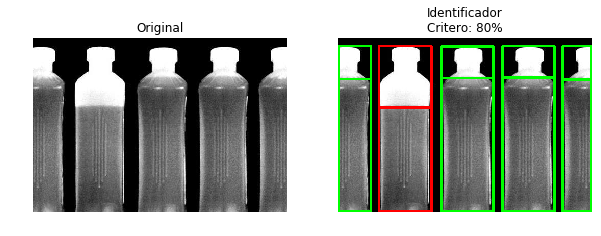

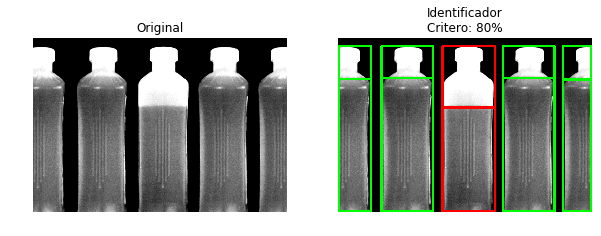

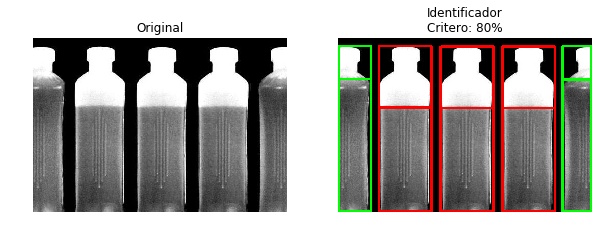

In [115]:
# Utils #######################################################

Color = {
    "Good": (   0, 255,   0),
    "Bad" : ( 255,   0,   0),
}

def blur(img, kernel):
    return cv2.blur(img, (kernel, kernel))

def thresh(img, th):
    _, ret = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)
    return ret

def adapt(img, kernel, th):
    res = img.copy()
    res = blur(res, kernel)
    res = thresh(res, th)
    return res

def rect(img, data, color):
    x1, y1, x2, y2 = data
    return cv2.rectangle(img, (x1,y1), (x2, y2), color, 3)

def rgb2gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def gray2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

def getContours(img):
    _, contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

###############################################################
img = [
    files["img"]["new_bottles"].copy(), 
    files["img"]["bottles"].copy(),
    files["img"]["three_bottles"].copy()
]
# Identificador ###############################################

def bottleCheker(img, limit):
    # Funcion identificadora del nivel de llenado de botellas
    #
    # Como parametros de entrada toma la imagen de las botellas y el porcentaje de llenado aceptable
    #
    # De salida regresa la imagen de entrada, pero con las botellas aceptables en verde y las defectuosas en rojo.
    # Tambien señala el nivel indetificado de llenado
    #
    test = img.copy()
    drawer = gray2rgb(test)

    h,w = test.shape

    completeImg = adapt(test, 6,  10)
    halfImg     = adapt(test, 6, 200)

    completeContours = getContours(completeImg)
    halfImgContours = getContours(halfImg)

    halfCoorMax, halfCoorMin = list(), list()

    
    for c in halfImgContours:
        x, y = list(), list()
        for cnt in c:
            x.append(cnt[0][0])
            y.append(cnt[0][1])
        halfCoorMax.append( [max(x), max(y)] )
        halfCoorMin.append( [min(x), min(y)] )
    
    index = 0
    for c in completeContours:

        cor_x, cor_y = list(), list()

        for cnt in c:
            cor_x.append(cnt[0][0])
            cor_y.append(cnt[0][1])

            
        for i in range(len(halfCoorMax)):
            if (halfCoorMax[i][0]>=min(cor_x)) and (halfCoorMax[i][0]<=max(cor_x)):
                index = i
        
        fill = 100 - ((halfCoorMax[index][1]-halfCoorMin[index][1]) / (max(cor_y) - min(cor_y)))*100

        if fill < limit :
            color = "Bad"
        else:
            color = "Good"
        
        drawer = rect(drawer, (min(cor_x) ,min(cor_y) ,max(cor_x) ,max(cor_y)), Color[color])
        drawer = rect(drawer, (min(cor_x) ,min(cor_y), max(cor_x), halfCoorMax[index][1]), Color[color])

        
    return drawer

###############################################################


# ploter ######################################################
porcentaje = 80
for i in range(len(img)):
    plt.figure(figsize=(10,10))
    
    temp = img[i].copy()
    
    plt.subplot(1, 2, 1)
    plt.imshow(temp, cmap="gray")
    plt.title("Original")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(bottleCheker(temp, porcentaje), cmap="gray")
    plt.title("Identificador\nCritero: " + str(porcentaje) + "%")
    plt.axis("off")
    
    plt.show()

###############################################################


# Clean Up ####################################################
img    = None
Color  = None
temp   = None
###############################################################

### Función y resultados

Para resolver el problema, se propone la función "bottleCheker" la cual se encarga de clasificar las botellas. Esto se debe hacer siguendo las condiciones de que estas deben estar lo suficiente mente separadas entre si (La separacion de las imagenes es suficiente), las condiciones de iluminacion deben ser tal y como las de la imagen (Fondo negro y el color del segmento vacio significativamente más claro que la botella), la botella no debe llevar stickers y se debe poder apreciar el punto medio de las botellas de los extremos.

Esta funcion requiere de un umbral el cual es el que define cuando las botellas estan llenas y cuando estan vacias. Con las pruebas que se consiguieron de las imagenes de muestra, se evidencia un valor del 80% de llenado desde la tapa hasta la parte más baja visible de la botella. Este valor puede ser variado con el segundo argumento de la funcion.

Una ves se optiene la imagene, se aplica un acondiconamiento a la iamgen el cual produce dos imagenes binarias. La primera es la imagen de la silueta total de la botella y la segunda es solamente del segmento vacio. Despues se saca el controno de estas imagenes y se optiene una array de puntos que separa las cinco botellas en la imagen. despues a cada controno se le extrae las coordenadas X,Y menores y mayores. Despues se calcula el tamaño vertical (Ymax - Ymin) del controno de la botella y de el segmento llenado. Con esta informacion se encuentra que tan llena esta la botella ( Segmento Vacio / Contorno Total x 100) y si este supera el humbral especificado anterirmente (80% para este caso), se marca verde si esta bien llenada o roja si es el caso contrario. 

Como se puede ver en las imagenes, la funcion es capas de detectar el nivel de todas las botellas y detectar cual de estas estan por debajo del humbral

---------------------------------

### Problem 4

Suppose that you are observing objects in the night sky. Suppose that only ‘big’ objects are important to your observation. In this scenario, ‘small’ objects are considered noise. Write a python function that processes the image as follows:

1. Use a 15x15 averaging filter to blur the image.

2. Apply a threshold of 0.25 to binarize the resulting blurred image.

3. Use the binary image to ‘mask’ the noise of the original image: simply perform an element-wise multiplication of the binary image and the original image.

4. Use connected component analysis on the binary image to count the number of ‘big’ objects found.

The function should take three inputs: an image matrix, the size of the averaging filter and threshold value. Make sure your function displays the intermediary results of each step outlined above.

Apply your function to the input image ‘hubble-original.tif’. Try different values of smoothing kernel size and threshold value. Analyze the relationship between number of objects found and smoothing kernel size and threshold value. In particular, you might want to observe the result when using an averaging filter of size n=1 (i.e. no smoothing).

In [32]:
def only_big(img, avsize, thvalue):
    
    immagine=img.copy()
    av_filter = np.ones((avsize,avsize))/avsize**2
    imm_blur = cv2.filter2D(immagine, cv2.CV_8U, av_filter)
    
    _,binary_img = cv2.threshold(imm_blur,thvalue*255,1,cv2.THRESH_BINARY)
    
    result = cv2.bitwise_and(immagine,immagine,mask=binary_img)
    
    _, contours, _ = cv2.findContours(result,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    numobjects = len(contours)
    
    return binary_image, result, numobjects

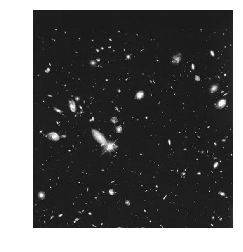

In [69]:
img1 = files["img"]["hubble-original"].copy()
plt.imshow(img1, cmap="gray")
plt.axis("off")
plt.show()
for i in [1,15,30]:
    for j in [0.25,0.5,0.75]:
        [bin_ima,out,num]=only_big(img1)
        plt.figure(figsize(16,16))
        plt.subplot(1,2,1)
        plt.imshow(bin_ima,cmap="gray")
        plt.axis("off")
        plt.title("Avfilter size: "+str(i)+ " Threshold: "+str(j))
        
        plt.subplot(1,2,2)
        plt.imshow(out,cmap="gray")
        plt.axis("off")
        plt.title("Number of objects: "+str(num))
        
        plt.show()
        
img2 = files["img"]["shapes"].copy()
plt.imshow(img2, cmap="gray")
plt.axis("off")
plt.show()
for i in [1,15,30]:
    for j in [0.25,0.5,0.75]:
        [bin_ima,out,num]=only_big(img2)
        plt.figure(figsize(16,16))
        plt.subplot(1,2,1)
        plt.imshow(bin_ima,cmap="gray")
        plt.axis("off")
        plt.title("Avfilter size: "+str(i)+ " Threshold: "+str(j))
        
        plt.subplot(1,2,2)
        plt.imshow(out,cmap="gray")
        plt.axis("off")
        plt.title("Number of objects: "+str(num))
        
        plt.show()
        


# Clean Up
img1=None
img2=None

## Conclusiones

En este punto se necesito el eliminar los objetos pequeños de la imagen y detectar la cantidad de objetos "grandes" que permanecen en la imagen. Para el caso de la imagen huble-original se ve que el efecto del average filter y la umbralizacion si surten efecto. Pero si observamos, el factor de threshold toma un efecto mayor pues cuando no se pasa un filtro es decir tamaño 1, vemos qeu la cantidad de objetos es menor a cuando se pasa el filtro mayor y el threshold es menor. Para el caso de la imagen shapes vemos como los valores de threshold y del tamaño del filtro no afecta el numero de objetos que aparecen en la imagen

### Problem 5

Write a Python function that computes the bag-of-features representation of an image. In order to accomplish this, your function will need to perform the following steps:

1. Load the input image and apply the SIFT transform to obtain descriptors from its interest points. 
2. Group descriptors: Your function should use the k-means clustering algorithm to group all input features into k=100 groups.
3. Compute a histogram that counts how many times each codebook entry is selected as the closest center.

Apply your function to all car images <tt>image_00XX.jpg</tt>. Store the result in a data file.


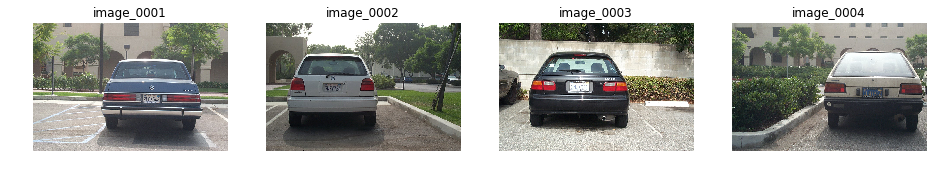

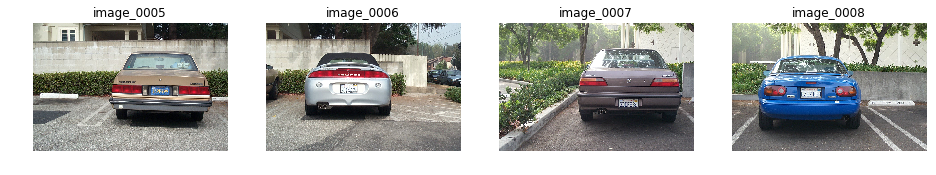

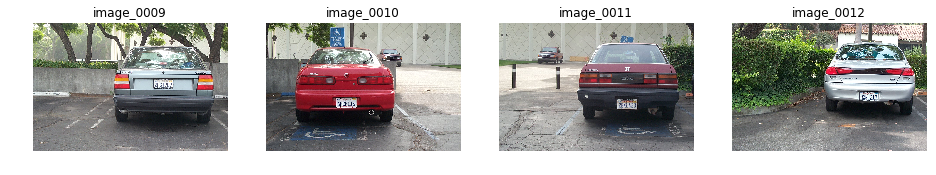

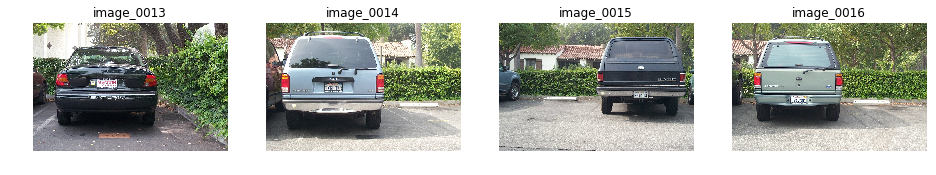

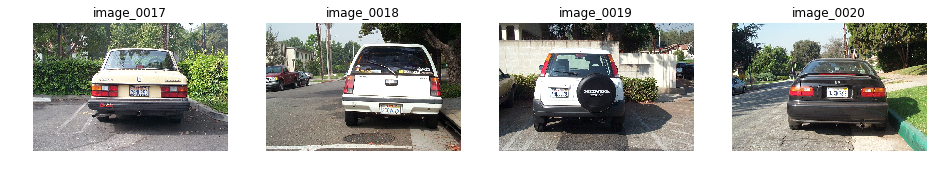

In [88]:
def bag_of_features(img):
    immagine = img.copy()
    gray_imag=cv2.cvtColor(immagine,cv2.COLOR_RGB2GRAY)
    
    #Step 1
    SIFT = cv2.xfeatures2d.SIFT_create()
    kp, des = SIFT.detectAndCompute(gray_imag,None)
    keypoints_image = cv2.drawKeypoints(gray_imag, kp, gray_imag)
    
    #Step 2
    criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 120, 1e-10)
    flag = cv2.KMEANS_PP_CENTERS
    k=100
    compactness, label, centers = cv2.kmeans(np.float32(des) , k , None , criteria , 10 , flag)
    
    #Step 3
    ft=[]
    for i in range(len(label)):
        ft.append(des[label.ravel()==i])
    return ft,label,kp,des,keypoints_image

img = files["car"].copy()

# Test
j = 1
for i in carKeys:
    
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(i)

    [ft,label,kp,des,key_image]= bag_of_features(img)

    plt.subplot(1,3,2)
    plt.imshow(key_image)
    plt.axis("off")
    plt.title("Interest Points")
    
    plt.subplot(1,3,3)
    for i in range(len(label)):
        plt.scatter(ft[i][:,0],ft[i][:,1])
    plt.show()
    
    jsonn = open("Descriptor_para_"+i+".json","w")
    data = {"Interest_points":kp.tolist(),"Descriptors": des.tolist()}
    json.dump(data,jsonn, sort_keys=True, indent=4)
    jsonn.close()
# Clean Up
img=None
j=None


## Conclusiones

Para este punto se debió primero crear un objeto sift, el cual se puede obtener por medio de la libreria de opencv, usando la funcion cv2.xfeatures2d.SIFT_create(). Posterior se obtienen los puntos de interes  y descriptores, los cuales se agrupan usando kmeans teniendo un k = 100 como presentaba el enunciado. Del punto es posible denotar que los descriptores obtenidos no son solo de los autos si no que tambien obtienen descriptores del entorno como las lineas de parqueo entre otros.